In [1]:
import scipy
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
Xtrn_org , Ytrn_org , Xtst_org , Ytst_org = load_Q2_dataset()
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean(Xtrn , axis=0)
Xtrn_m = Xtrn - Xmean ; Xtst_m = Xtst - Xmean # Mean−normalised versions
%matplotlib inline

      min  max      mean       std
Xtrn  0.0  1.0  0.177377  0.334982
Xtst  0.0  1.0  0.175634  0.333463


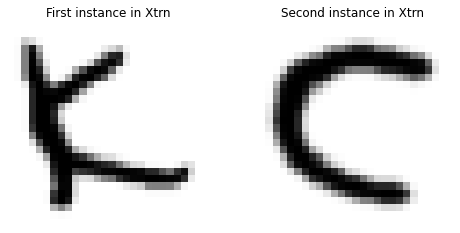

In [2]:
#2.1
def describe_data(input_array):
    return [np.min(input_array), np.max(input_array), np.mean(input_array), np.std(input_array)]

describe_df = pd.DataFrame(data=[describe_data(Xtrn),describe_data(Xtst)],
                           columns=['min','max','mean','std'], index=['Xtrn', 'Xtst'])
print(describe_df)
fig, ax = plt.subplots(1,2, figsize = (8,8))
#TODO check graph type
ax[0].imshow(Xtrn[0].reshape(28,28).T, cmap='gray_r', )
ax[0].set_title('First instance in Xtrn')
ax[0].axis('off')
ax[1].imshow(Xtrn[1].reshape(28,28).T, cmap='gray_r')
ax[1].set_title('Second instance in Xtrn')
ax[1].axis('off')
fig.savefig('q2.1.jpg')

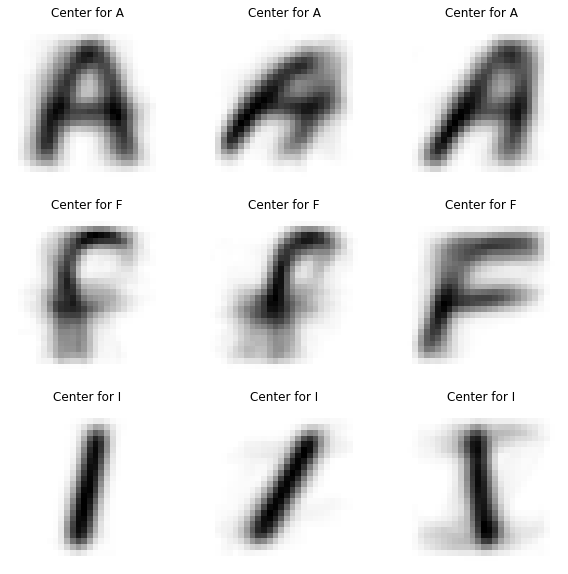

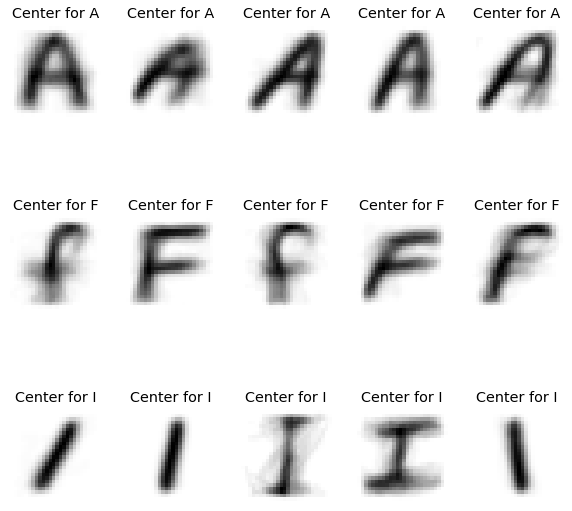

In [3]:
from sklearn.cluster import KMeans

#2.3
k_values_list = [3,5]
class_values_list = [0,5,8]
class_label_list = ['A','F','I']
cluster_centers = dict()
for k in k_values_list:
    centres = []
    for class_values in class_values_list:
        Xtrn_selected = Xtrn[np.argwhere(Ytrn == class_values)]
        Xtrn_selected = Xtrn_selected.reshape(Xtrn_selected.shape[0],Xtrn_selected.shape[-1])
        km = KMeans(n_clusters=k, random_state=0)
        km.fit(Xtrn_selected)
        for cluster in km.cluster_centers_:
            centres.append(cluster)
    cluster_centers[k] = centres
    fig, ax = plt.subplots(3,k, figsize = (10,10))
    for i in range(3*k):
        ax[int(i / k)][i % k].set_title('Center for {0}'.format(class_label_list[int(i / k)]))
        ax[int(i / k)][i % k].axis('off')
        ax[int(i / k)][i % k].imshow(centres[i].reshape(28,28).T, cmap='gray_r')
    plt.rcParams.update({'font.size': 12})
    fig.savefig('q2.3_{0}.jpg'.format(k))

In [4]:
# k_values
# fig, ax = plt.subplots(3,3, figsize = (8,8))
# for i in range(3*3)

# Xtrn[np.argwhere(Ytrn == 0)][0]
# plt.figure(figsize=(8,8))
# plt.imshow(Xtrn[np.argwhere(Ytrn == 0)][5].reshape(28,28).T, cmap='gray_r')
# fig, ax = plt.subplots(1,2, figsize = (8,8))
# test = Xtrn[np.argwhere(Ytrn == 0)]
# print(test.reshape(300,784).shape)
# km = KMeans(n_clusters=3, random_state=0)
# km.fit(test.reshape(300,784))
# km.cluster_centers_
# plt.figure(figsize=(8,8))
# plt.imshow(km.cluster_centers_[0].reshape(28,28).T, cmap='gray_r')

In [17]:
from sklearn.linear_model import LogisticRegression

#2.5
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(Xtrn_m, Ytrn)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_m, Ytrn)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_m, Ytst)))

Classification accuracy on training set: 0.916
Classification accuracy on test set: 0.722


Top 0 misclassified: Class number:11 Corresponding:L misclassification number:53
Top 1 misclassified: Class number:17 Corresponding:R misclassification number:48
Top 2 misclassified: Class number:8 Corresponding:I misclassification number:43
Top 3 misclassified: Class number:10 Corresponding:K misclassification number:38
Top 4 misclassified: Class number:13 Corresponding:N misclassification number:36
Has been classified as  8 and should be  11
Has been classified as  23 and should be  11
Has been classified as  8 and should be  11
Has been classified as  8 and should be  11
Has been classified as  8 and should be  11
Has been classified as  0 and should be  17
Has been classified as  25 and should be  17
Has been classified as  10 and should be  17
Has been classified as  10 and should be  17
Has been classified as  22 and should be  17
Has been classified as  18 and should be  8
Has been classified as  16 and should be  8
Has been classified as  4 and should be  8
Has been classified 

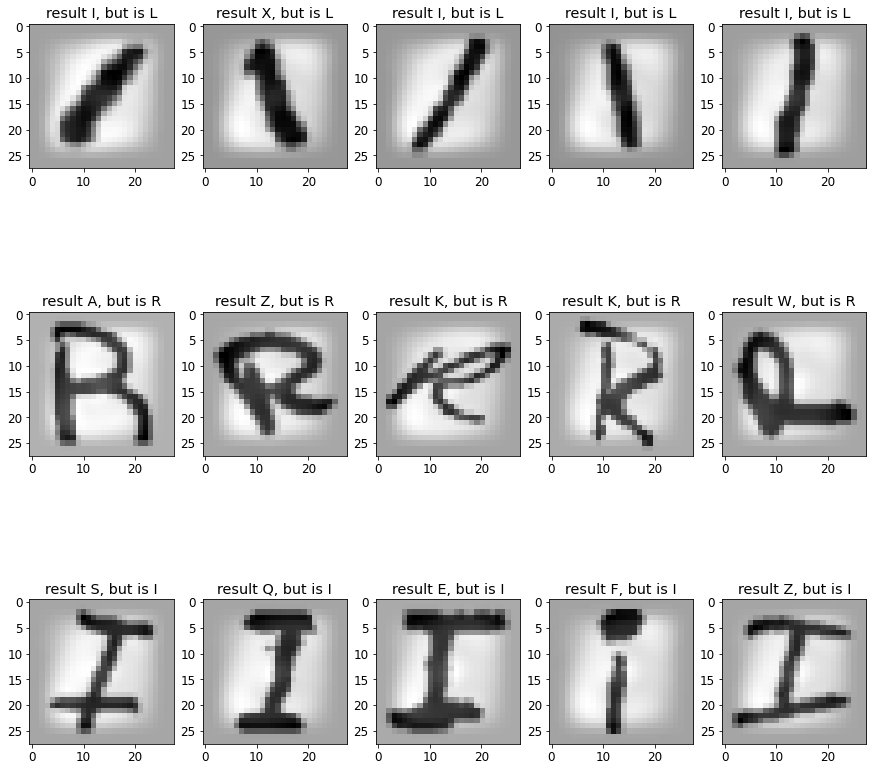

In [18]:
lr_result = dict()
for i in range(26):
    Xtest_selected = Xtst_m[np.argwhere(Ytst == i)]
    Xtest_selected = Xtest_selected.reshape(Xtest_selected.shape[0],Xtest_selected.shape[-1])
    Ytest_selected = Ytst[np.argwhere(Ytst == i)]
    Ytest_selected = Ytest_selected.reshape(Ytest_selected.shape[0],Ytest_selected.shape[-1])
    lr_result[i] = lr.score(Xtest_selected, Ytest_selected)
lr_result = dict(sorted(lr_result.items(), key=lambda item: item[1]))
# list(lr_result.keys())[0]
for i in range(5):
    lr_result_class_num = list(lr_result.keys())[i]
    lr_result_class_result = lr_result[lr_result_class_num]
    corresponding_char = chr(ord('A')+lr_result_class_num)
    total_num_in_class = len(Ytst[np.argwhere(Ytst == lr_result_class_num)])
    number_of_misclassification = total_num_in_class - int(total_num_in_class * lr_result_class_result)
    print('Top {0} misclassified: Class number:{1} Corresponding:{2} misclassification number:{3}'
          .format(i, lr_result_class_num, corresponding_char, number_of_misclassification))
fig, ax = plt.subplots(3,5, figsize = (15,15))
j=0
for i in [11,17,8]:
    Xtest_selected = Xtst_m[np.argwhere(Ytst == i)]
    Xtest_selected = Xtest_selected.reshape(Xtest_selected.shape[0],Xtest_selected.shape[-1])
    Ytest_selected = Ytst[np.argwhere(Ytst == i)]
    Ytest_selected = Ytest_selected.reshape(Ytest_selected.shape[0],Ytest_selected.shape[-1])
    predictions = lr.predict(Xtest_selected)
    k = 0
    for input, prediction in zip(Xtest_selected, predictions):
        if prediction != i:
            print('Has been classified as ', prediction, 'and should be ', i)
            ax[j][k].imshow(input.reshape(28,28).T, cmap='gray_r')
            ax[j][k].set_title('result {0}, but is {1}'.format(chr(ord('A')+prediction),chr(ord('A')+i)))
            k+=1
        if k == 5:
            j +=1
            break
fig.savefig('q2.5c.jpg'.format(k),bbox_inches='tight')

In [7]:
#2.6
#a
# Turning C values / Tolerance (hyper parameters turning)
# standardization / normalization
# change solver
#b
# xxxxx
#c
c_list = []
train_score = []
test_score = []
for i in range(1,11):
    c_list.append(i*0.1)
    lr = LogisticRegression(max_iter=1000, random_state=0, C=i*0.1)
    lr.fit(Xtrn_m, Ytrn)
    train_score.append(lr.score(Xtrn_m, Ytrn))
    test_score.append(lr.score(Xtst_m, Ytst))
    # print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_m, Ytrn)))
    # print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_m, Ytst)))

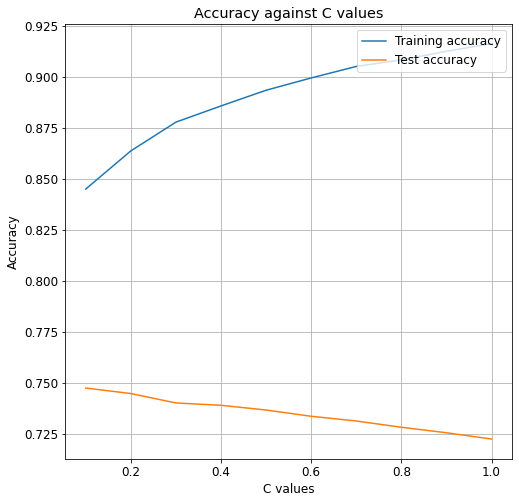

In [8]:
plt.figure(figsize=(8,8))
plt.plot(c_list,train_score)
plt.plot(c_list,test_score)
plt.title('Accuracy against C values')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend(["Training accuracy", "Test accuracy"],loc="upper right")
plt.grid()
plt.savefig('q2.6.jpg')

In [9]:
lr = LogisticRegression(max_iter=1000, random_state=0, C=0.1)
lr.fit(Xtrn_m, Ytrn)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_m, Ytrn)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_m, Ytst)))

Classification accuracy on training set: 0.845
Classification accuracy on test set: 0.747


Describe cov matrix:
[-0.09747401775408393, 0.18378613679585537, 0.001708791632836062, 0.015808106215420965]
Describe diagonal cov matrix:
[0.0, 0.18378613679585537, 0.07231314807821396, 0.0693913123066461]
(784, 784)


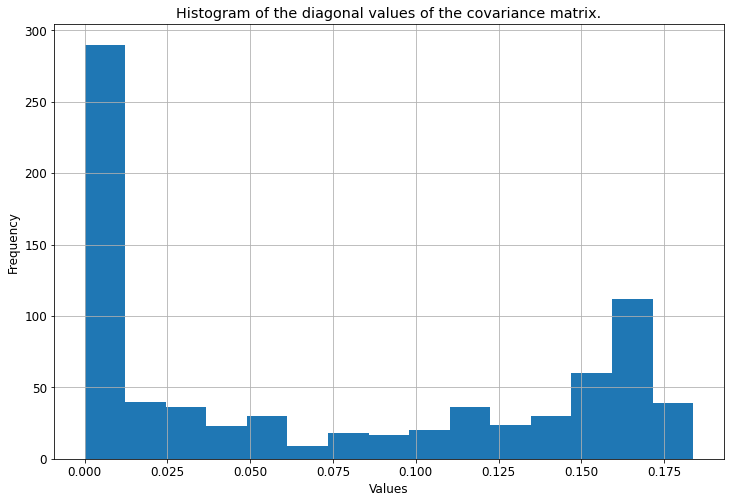

sig=0.000000


LinAlgError: singular matrix

In [10]:
from scipy.stats import multivariate_normal

#2.7
Xtrn_m_A = Xtrn_m[np.argwhere(Ytrn == 0)]
Xtrn_m_A = Xtrn_m_A.reshape(300, 784)
Xtrn_m_A_mean = np.mean(Xtrn_m_A, axis=0)
Xtrn_m_A_cov = np.cov(Xtrn_m_A, rowvar=False)
print("Describe cov matrix:")
print(describe_data(Xtrn_m_A_cov))
print("Describe diagonal cov matrix:")
print(describe_data(np.diagonal(Xtrn_m_A_cov)))
print(Xtrn_m_A_cov.shape)

plt.figure(figsize=(12,8))
plt.grid()
plt.hist(np.diagonal(Xtrn_m_A_cov), bins=15)
plt.title('Histogram of the diagonal values of the covariance matrix.')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.savefig('q2.7.jpg'.format(k),bbox_inches='tight')
plt.show()

print('sig=%f' % np.linalg.det(Xtrn_m_A_cov))
Xtst_m_A = Xtst[np.argwhere(Ytst == 0)]
Xtst_m_A = Xtst_m_A.reshape(100, 784)
mn = multivariate_normal(mean=Xtrn_m_A_mean,cov=Xtrn_m_A_cov)
mn.pdf(Xtst_m_A[0])

#diagonal matrix contains zero, causing det=0, causing it singular matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

#2.8
Xtrn_m_A = Xtrn_m[np.argwhere(Ytrn == 0)]
Xtrn_m_A = Xtrn_m_A.reshape(300, 784)
Xtst_m_A = Xtst[np.argwhere(Ytst == 0)]
Xtst_m_A = Xtst_m_A.reshape(100, 784)
gm = GaussianMixture(n_components=1, covariance_type='full')
gm.fit(Xtrn_m_A)
print(Xtrn_m_A[0].shape)
print(Xtst_m_A[0].shape)
print(gm.score([Xtst_m_A[0]]))

In [ ]:
train_y_pred_result_array = []
test_y_pred_result_array = []
for i in range(26):
    Xtrn_features = Xtrn_m[np.argwhere(Ytrn == i)]
    Xtrn_features = Xtrn_features.reshape(Xtrn_features.shape[0], 784)
    Xtst_features = Xtst[np.argwhere(Ytst == i)]
    Xtst_features = Xtst_features.reshape(Xtst_features.shape[0], 784)
    # Ytrn_features = Ytrn[np.argwhere(Ytrn == i)]
    # Ytst_features = Ytst[np.argwhere(Ytst == i)]
    gm = GaussianMixture(n_components=1, covariance_type='full')
    gm.fit(Xtrn_features)
    gm_train_y_pred = gm.score_samples(Xtrn_m)
    gm_test_y_pred = gm.score_samples(Xtst_m)
    train_y_pred_result_array.append(gm_train_y_pred)
    test_y_pred_result_array.append(gm_test_y_pred)
    # print(gm_train_y_pred)
    # train_score = accuracy_score(Ytrn_features, gm_train_y_pred)
    # test_score = accuracy_score(Ytst_features, gm_test_y_pred)
    # print('Classifiting {0}. Correct instances:{1}. Training accuracy:{2}. Test accuracy:{3}'.format(chr(ord('A')+i), 1, train_score, test_score))

In [ ]:
# np.array(train_y_pred_result_array).shape
train_y_pred_result_array_T = np.array(train_y_pred_result_array).T
train_y_pred_result = [np.argmax(result) for result in train_y_pred_result_array_T]
train_score = accuracy_score(Ytrn, train_y_pred_result)
print(train_score)
test_y_pred_result_array_T = np.array(test_y_pred_result_array).T
test_y_pred_result = [np.argmax(result) for result in test_y_pred_result_array_T]
test_score = accuracy_score(Ytst, test_y_pred_result)
print(test_score)
print('Correct instances on traning:{0:.0f}. Train accuracy:{1:.3f}'.format(train_score * len(Xtrn_m), train_score))
print('Correct instances on testing:{0:.0f}. Test accuracy:{1:.3f}'.format(test_score * len(Xtst_m), test_score))